In [1]:
# CSC 732 Final Part 2 Problem 1 Ensemble Classifier
# Dominic Klusek, Jonathan Rozen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D 
from keras.layers.core import Flatten, Dropout, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras import backend as K
from skimage import transform
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import os
import glob
import tqdm

Using TensorFlow backend.


In [3]:
classifier_1 = keras.models.load_model('dice_relu_softmax_Adagrad_less_steps.h5')
classifier_2 = keras.models.load_model('dice_relu_softmax_Adam_less_steps.h5')
classifier_3 = keras.models.load_model('dice_relu_softmax_RMSProp_less_steps.h5')

In [4]:
# create image generator
datagenerator = ImageDataGenerator(
rescale=1./255.,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2)

In [5]:
# lists to hold train images and train labels
X_train = []
Y_train = []

# load in images and labels based on how generators label data
# for each file in class folder
for file in tqdm.tqdm(glob.glob('Datasets/train/d4/*.jpg')):
    # append original image
    # load image
    image = plt.imread(file)
    # resize to 100x100
    image = transform.resize(image, (100,100))
    # append image and label to appropriate lists
    X_train.append(image)
    Y_train.append(3)
    
    # create some random images, and append to list
    img_tensor = image
    img_tensor = datagenerator.apply_transform(img_tensor, datagenerator.get_random_transform(img_tensor.shape))
    X_train.append(img_tensor)
    Y_train.append(3)
    
# for each file in class folder
for file in tqdm.tqdm(glob.glob('Datasets/train/d6/*.jpg')):
    # load image
    image = plt.imread(file)
    # resize to 100x100
    image = transform.resize(image, (100,100))
    # append image and label to appropriate lists
    X_train.append(image)
    Y_train.append(4)
    
# for each file in class folder
for file in tqdm.tqdm(glob.glob('Datasets/train/d8/*.jpg')):
    # load image
    image = plt.imread(file)
    # resize to 100x100
    image = transform.resize(image, (100,100))
    # append image and label to appropriate lists
    X_train.append(image)
    Y_train.append(5)
    
    # create some random images, and append to list
    img_tensor = image
    img_tensor = datagenerator.apply_transform(img_tensor, datagenerator.get_random_transform(img_tensor.shape))
    X_train.append(img_tensor)
    Y_train.append(5)
    
# for each file in class folder
for file in tqdm.tqdm(glob.glob('Datasets/train/d10/*.jpg')):
    # load image
    image = plt.imread(file)
    # resize to 100x100
    image = transform.resize(image, (100,100))
    # append image and label to appropriate lists
    X_train.append(image)
    Y_train.append(0)
    
    # create some random images, and append to list
    img_tensor = image
    img_tensor = datagenerator.apply_transform(img_tensor, datagenerator.get_random_transform(img_tensor.shape))
    X_train.append(img_tensor)
    Y_train.append(0)

# for each file in class folder
for file in tqdm.tqdm(glob.glob('Datasets/train/d12/*.jpg')):
    # load image
    image = plt.imread(file)
    # resize to 100x100
    image = transform.resize(image, (100,100,3))
    # append image and label to appropriate lists
    X_train.append(image)
    Y_train.append(1)
    
    # create some random images, and append to list
    img_tensor = image
    img_tensor = datagenerator.apply_transform(img_tensor, datagenerator.get_random_transform(img_tensor.shape))
    X_train.append(img_tensor)
    Y_train.append(1)

# for each file in class folder
for file in tqdm.tqdm(glob.glob('Datasets/train/d20/*.jpg')):
    # load image
    image = plt.imread(file)
    # resize to 100x100
    image = transform.resize(image, (100,100))
    # append image and label to appropriate lists
    X_train.append(image)
    Y_train.append(2)
    
# convert lists to arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)

100%|██████████████████████████████████████████████████████████████████████████████| 2590/2590 [00:59<00:00, 43.35it/s]


In [6]:
# lists to hold test images and test labels
X_test = []
Y_test = []

# load in images and labels based on how generators label data
# for each file in class folder
for file in glob.glob('Datasets/test/d4/*.jpg'):
    # load image
    image = plt.imread(file)
    # resize to 100x100
    image = transform.resize(image, (100,100))
    # append image and label to appropriate lists
    X_test.append(image)
    Y_test.append(3)
    
# for each file in class folder
for file in glob.glob('Datasets/test/d6/*.jpg'):
    # load image
    image = plt.imread(file)
    # resize to 100x100
    image = transform.resize(image, (100,100))
    # append image and label to appropriate lists
    X_test.append(image)
    Y_test.append(4)
    
# for each file in class folder
for file in glob.glob('Datasets/test/d8/*.jpg'):
    # load image
    image = plt.imread(file)
    # resize to 100x100
    image = transform.resize(image, (100,100))
    # append image and label to appropriate lists
    X_test.append(image)
    Y_test.append(5)
    
# for each file in class folder
for file in glob.glob('Datasets/test/d10/*.jpg'):
    # load image
    image = plt.imread(file)
    # resize to 100x100
    image = transform.resize(image, (100,100))
    # append image and label to appropriate lists
    X_test.append(image)
    Y_test.append(0)

# for each file in class folder
for file in glob.glob('Datasets/test/d12/*.jpg'):
    # load image
    image = plt.imread(file)
    # resize to 100x100
    image = transform.resize(image, (100,100,3))
    # append image and label to appropriate lists
    X_test.append(image)
    Y_test.append(1)

# for each file in class folder
for file in glob.glob('Datasets/test/d20/*.jpg'):
    # load image
    image = plt.imread(file)
    # resize to 100x100
    image = transform.resize(image, (100,100))
    # append image and label to appropriate lists
    X_test.append(image)
    Y_test.append(2)
    
# convert lists to arrays
X_test = np.array(X_test)

# shuffle test dataset
X_test, Y_test = shuffle(X_test, Y_test, random_state=0)

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
# convert class labels to categorical
encoder = OneHotEncoder(sparse=False)
encoder.fit(np.expand_dims(Y_train, axis=1))
Y_test_cat = encoder.transform(np.expand_dims(Y_test, axis=1))

In [9]:
#model.load_weights('cats_and_dogs_relu_sigmoid_Adam.h5')
# Evaluate classifier with test image generator
evaluation = classifier_1.evaluate(X_test, Y_test_cat, verbose=1)
print("Test Loss: %.4f" % evaluation[0])
print("Test Accuracy: %.4f" % (evaluation[1]*100))

1576/1576 [==============================] - 2s 1ms/step
Test Loss: 0.0588
Test Accuracy: 99.1117


In [10]:
#model.load_weights('cats_and_dogs_relu_sigmoid_Adam.h5')
# Evaluate classifier with test image generator
evaluation = classifier_2.evaluate(X_test, Y_test_cat, verbose=1)
print("Test Loss: %.4f" % evaluation[0])
print("Test Accuracy: %.4f" % (evaluation[1]*100))

1576/1576 [==============================] - 1s 428us/step
Test Loss: 0.0381
Test Accuracy: 99.4289


In [11]:
#model.load_weights('cats_and_dogs_relu_sigmoid_Adam.h5')
# Evaluate classifier with test image generator
evaluation = classifier_3.evaluate(X_test, Y_test_cat, verbose=1)
print("Test Loss: %.4f" % evaluation[0])
print("Test Accuracy: %.4f" % (evaluation[1]*100))

1576/1576 [==============================] - 1s 425us/step
Test Loss: 0.0375
Test Accuracy: 99.4924


In [12]:
# make an ensemble prediction for multi-class classification
def ensemble_predictions(classifiers, X_test):
    # make predictions
    yhats = [model.predict(X_test) for model in classifiers]
    yhats = np.array(yhats)
    # sum across ensemble members
    summed = np.sum(yhats, axis=0)
    # argmax across classes
    result = np.argmax(summed, axis=-1)
    return np.reshape(result, (-1,1))
 
# evaluate ensemble model
def evaluate_members(classifiers, X_test, Y_test):
    Y_test = np.argmax(Y_test, axis=-1)
    # make prediction
    yhat = ensemble_predictions(classifiers, X_test)
    print(classification_report(Y_test, yhat, digits=4))
    # calculate accuracy
    return 

In [13]:
# get predicting using hard voting
predictions = encoder.transform(ensemble_predictions([classifier_1, classifier_2, classifier_3], X_test))

In [14]:
from sklearn.metrics import r2_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, roc_curve, auc, confusion_matrix
from scipy import interp
from itertools import cycle

C:\Users\kluse\Anaconda3\envs\MLearning\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


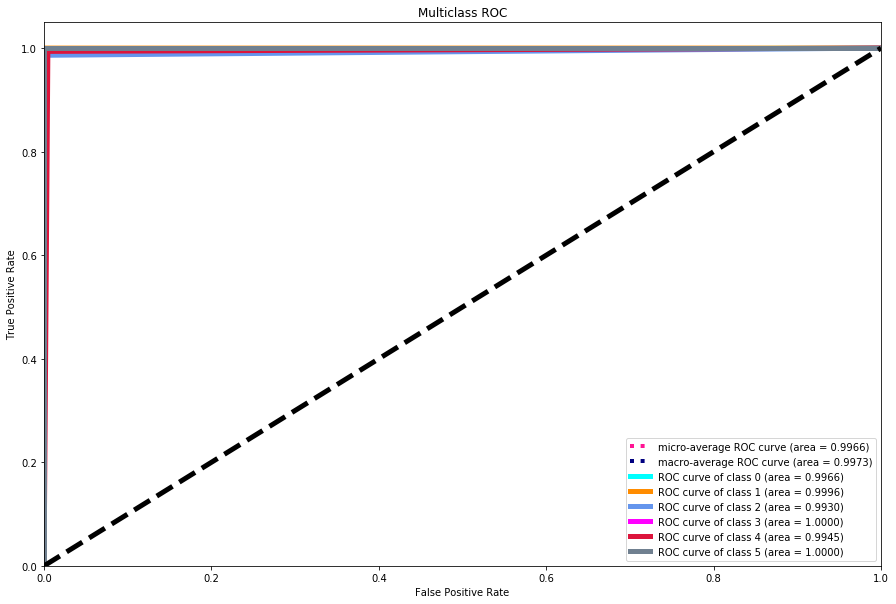

In [18]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(Y_test_cat[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_cat.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(6)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(6):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 6

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# set line width of graphs
lw = 5

# Plot all ROC curves
plt.figure(figsize=(15,10), facecolor='w')
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'fuchsia', 'crimson', 'slategray'])
for i, color in zip(range(6), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC')
plt.legend(loc="lower right")
plt.show()

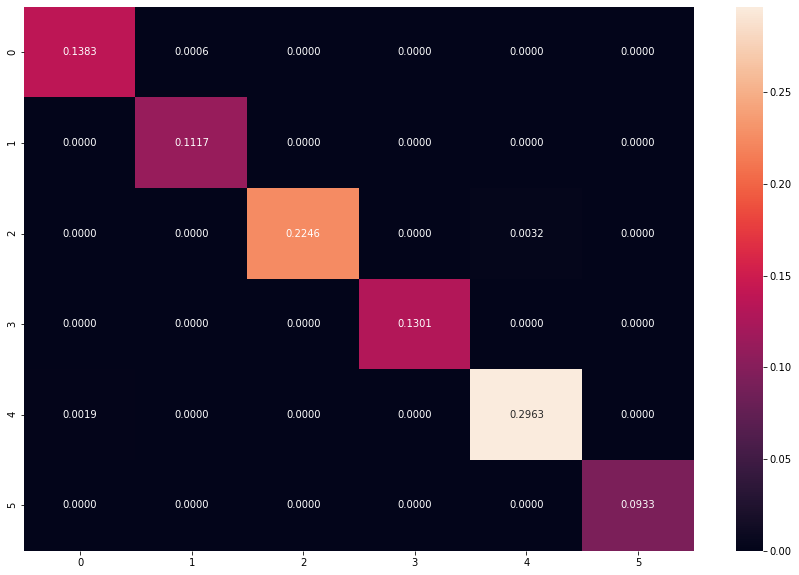

In [16]:
# plot confusion matrix
plt.figure(figsize=(15,10), facecolor='w')
numerical_Y_test = encoder.inverse_transform(Y_test_cat)[:,0]
numerical_predictions = encoder.inverse_transform(predictions)[:,0]
sns.heatmap(confusion_matrix(numerical_Y_test, numerical_predictions, normalize='all'), fmt='.4f', annot=True)

In [17]:
evaluate_members([classifier_1, classifier_2, classifier_3], X_test, Y_test_cat)

              precision    recall  f1-score   support

           0     0.9864    0.9954    0.9909       219
           1     0.9944    1.0000    0.9972       176
           2     1.0000    0.9861    0.9930       359
           3     1.0000    1.0000    1.0000       205
           4     0.9894    0.9936    0.9915       470
           5     1.0000    1.0000    1.0000       147

    accuracy                         0.9943      1576
   macro avg     0.9950    0.9959    0.9954      1576
weighted avg     0.9943    0.9943    0.9943      1576

